# 4 - Monte Carlo Integration (II)

##### Imports:

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import statistics 
import time

##### Configure matplotlib settings

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     "font.serif": "Modern Roman",
     "figure.figsize": (10, 8),
     "axes.titlesize" : 26,
     "axes.labelsize" : 28,
     "lines.linewidth": 3,
     "lines.markersize" : 10,
     "legend.fontsize":20,
     "xtick.labelsize" : 24,
     "ytick.labelsize" : 24})

In [3]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

##### Functions:

In [30]:
def mag(x): 
    '''Calculates the magnitude of a vector'''
    return np.sqrt(np.dot(x, x))

In [7]:
def flip_coin(p):
    '''Return True with probability p, return false with probability 1-p'''
    x = random.uniform(0, 1)
    if x <= p:
        return True
    else:
        return False

In [29]:
def update_pos(pos, h):
    '''Updates the position according to metropolis algorithm described in the exercise'''
    
    delta = np.array([random.uniform(-h/2, h/2), random.uniform(-h/2, h/2), random.uniform(- h/2, h/2)])
    newpos = pos + delta
    if mag(newpos) < mag(pos):
        return newpos
    else:
        A = np.exp(-0.5*(mag(newpos)**2 - mag(pos)**2))  # acceptance ratio
        if flip_coin(A) == True:
            return newpos
        else:
            return pos

In [9]:
def get_random_walk(nstep, h, start_pos = np.array([0, 0, 0])):
    walk = [start_pos]
    for step in range(nstep):
        newpos = update_pos(walk[-1], h)
        walk.append(newpos)
    return walk

Store the exact value of the integral (see section 3):

In [10]:
exact = 3*(2*np.pi)**1.5

## 4.1 - Trajectories


In [14]:
nstep = 10**4

### 4.1.1 - Trajectory from $\mathbf{r}_0 = (0, 0, 0)$

Starting position: origin. Note that the function \texttt{get\_random\_walk} takes the origin by default as starting position. 
In the next command block, I change the width of the lines with which matplotlib plots, since otherwise the figure is just a mess.

In [24]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '--'
plt.rcParams['lines.markersize'] = 3

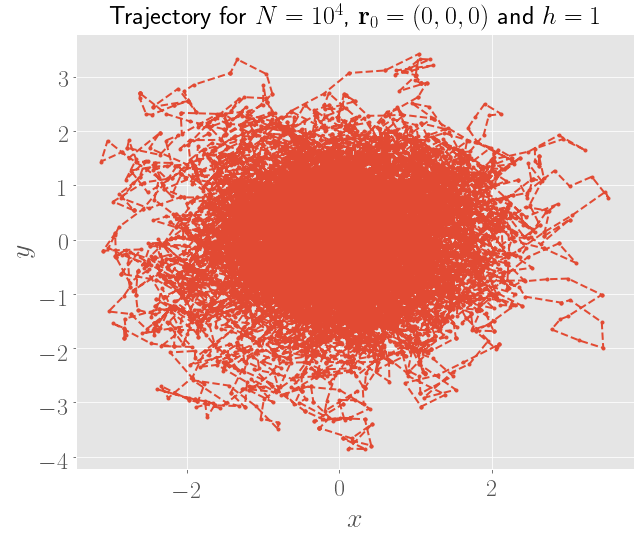

In [26]:
h = 1
walk = get_random_walk(nstep, h)
x = [v[0] for v in walk]; y = [v[1] for v in walk]

plt.plot(x, y, marker = 'o')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Trajectory for $N = 10^4$, $\mathbf{r}_0 = (0, 0, 0)$ and $h = 1$')
plt.show()

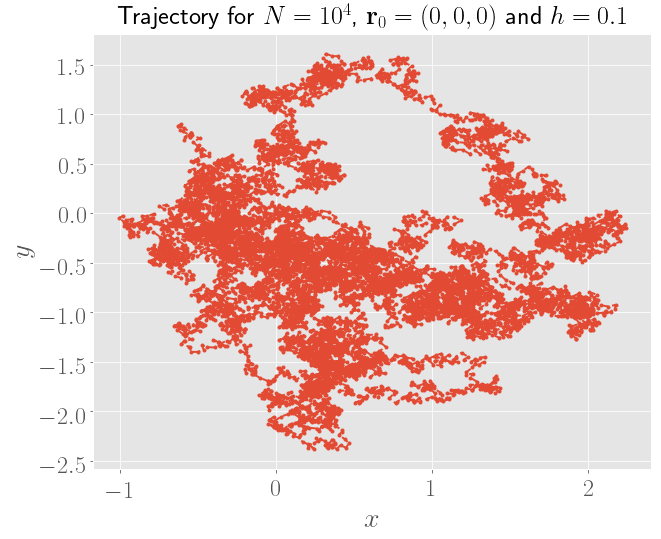

In [31]:
h = 0.1
walk = get_random_walk(nstep, h)
x = [pos[0] for pos in walk]; y = [pos[1] for pos in walk]

plt.plot(x, y, marker = 'o')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Trajectory for $N = 10^4$, $\mathbf{r}_0 = (0, 0, 0)$ and $h = 0.1$')
plt.show()

## 4.1.2 - Trajectory from $\mathbf{r}_0 = (10, 10, 10)$

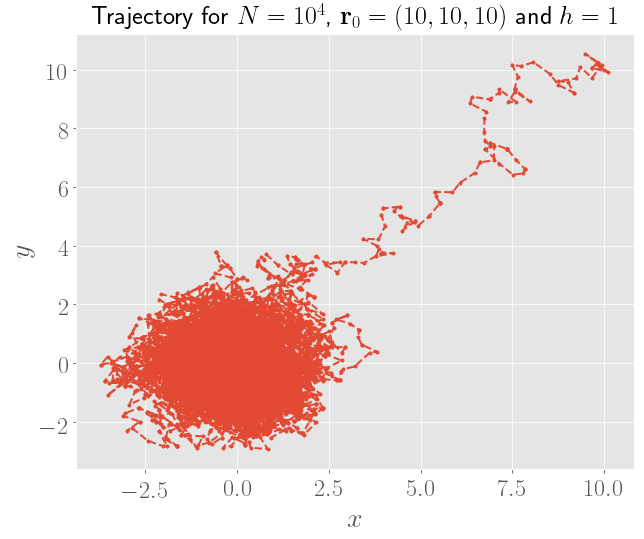

In [33]:
h = 1; start_pos = np.array([10, 10, 10])
walk = get_random_walk(nstep, h, start_pos)
x = [pos[0] for pos in walk]; y = [pos[1] for pos in walk]

plt.plot(x, y, marker = 'o')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Trajectory for $N = 10^4$, $\mathbf{r}_0 = (10, 10, 10)$ and $h = 1$')
plt.show()

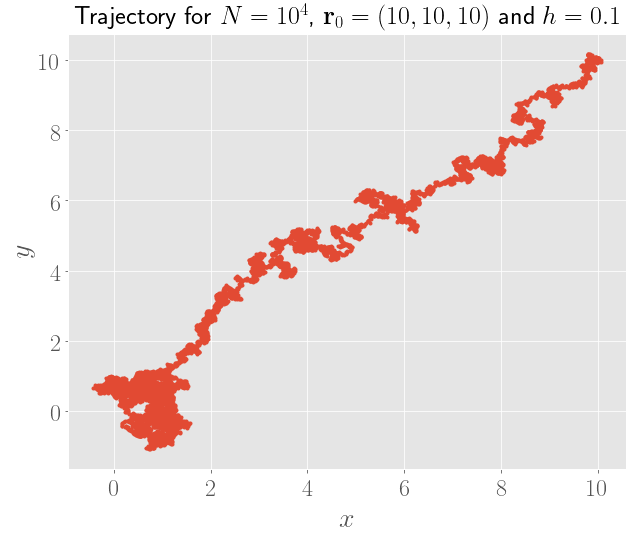

In [35]:
h = 0.1;  start_pos = np.array([10, 10, 10])
walk = get_random_walk(nstep, h, start_pos)
x = [pos[0] for pos in walk]; y = [pos[1] for pos in walk]

plt.plot(x, y, marker = 'o')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Trajectory for $N = 10^4$, $\mathbf{r}_0 = (10, 10, 10)$ and $h = 0.1$')
plt.show()

### 4.2.1 - Histogram of positions: for $\mathbf{r}_0 = (0, 0, 0)$

In [13]:
nstep = 10**6; h = 1

walk =get_random_walk(nstep, h)
xdata = [v[0] for v in walk]; ydata = [v[1] for v in walk]

# Obtain magnitudes of positions
#distances = [mag(pos) for pos in walk]
#mean_distance = np.mean(distances)

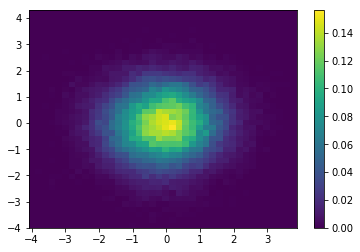

In [15]:
plt.hist2d(xdata, ydata, normed = True, bins = 40)
plt.colorbar()
plt.show()

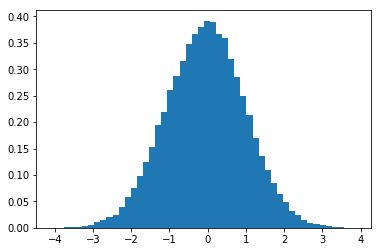

In [16]:
plt.hist(xdata, density = True, bins = 50)
plt.show()

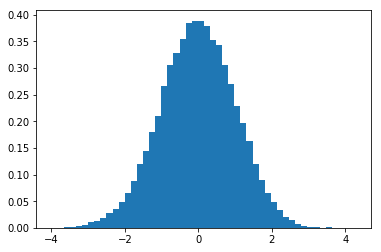

In [17]:
plt.hist(ydata, density = True, bins = 50)
plt.show()

## 4.2 - Numerical integration

In [120]:
#Number of points per run: npts
#Number of replicas: nrep
npts = 10**3; nrep = 120;

In [121]:
def g(x, y, z):
    return (x + y + z)**2

In [122]:
h = 1

In [123]:
def approximate_integral(npts, nrep, h, start_pos = np.array([0, 0, 0])):
    I = []
    pos = start_pos
    
    for k in range(nrep):
        s = 0
        for i in range(npts):
            newpos = update_pos(pos, h)
            x, y, z = newpos[0], newpos[1], newpos[2]
            s += g(x, y, z)
            pos = newpos
        I.append(s*(2*np.pi)**1.5/npts)
    return I

In [128]:
h = 1
I = approximate_integral(npts, nrep, h)

In [129]:
print(npts)

1000


In [130]:
print(np.mean(I))

47.75106613243631


In [131]:
print(exact)

47.24882983716726


## 4.3 - Equilibration 

In [59]:
def steps_integral(nstep, h, start_pos = np.array([0, 0, 0])):
    I = []
    s = []
    pos = start_pos
    
    for i in range(nstep):
        if i == 0:
            x, y, z = start_pos[0], start_pos[1], start_pos[2]
            value = g(x,  y, z)
            
            s.append(value)
            I.append(value*(2*np.pi)**1.5)
        
        else:
            newpos = update_pos(pos, h)
            x, y, z = newpos[0], newpos[1], newpos[2]
        
            s.append(s[-1] + g(x, y, z))
            new_val = (s[-1]*(2*np.pi)**1.5)/(i+1) 
            I.append(new_val)
        
            pos = newpos
    return I

Let us first see for starting position at the origin.

In [90]:
nstep = 10**6; h = 1
I = steps_integral(nstep, h)

(30, 100)

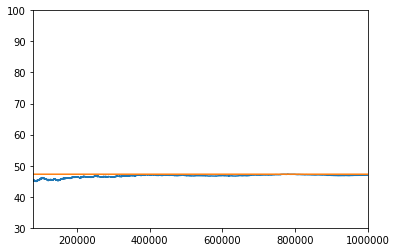

In [91]:
plt.plot([i for i in range(nstep)], I)
plt.plot([i for i in range(nstep)], [exact for i in range(nstep)])
plt.xlim(80000, nstep)
plt.ylim(30, 100)
plt.show()

In [94]:
nstep = 10**6; h = 1
start_pos = np.array([10, 10, 10])

I = steps_integral(nstep, h, start_pos)

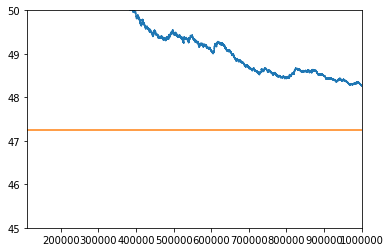

In [100]:
plt.plot([i for i in range(nstep)], I)
plt.plot([i for i in range(nstep)], [exact for i in range(nstep)])
plt.xlim(110000, nstep)
plt.ylim(45, 50)
plt.show()

In [ ]:
I2 = approximate_integral(nstep, nrep, )

## BONUS: Random Walk animation

In [29]:
def run(i):
    global walk
    # first frame
    if i == 0:
        line, = ax.plot([], [], lw=2)
        #ax.plot(0, 0)
        return line

    # update:
    newpos = update_pos(walk[-1], h)
    walk.append(newpos)
    
    # data
    xdata = [pos[0] for pos in walk]
    ydata = [pos[1] for pos in walk]
    
    # new bounds:
    ax.set_xlim(min(-1, min(xdata) - 1), max(1, max(xdata) + 1))
    ax.set_ylim(min(-1, min(ydata) - 1), max(1, max(ydata) + 1))
    
    # redraw the plot
    line, = ax.plot([], [], lw=2)
    line.set_data(xdata, ydata)
    ax.plot(walk[-1][0], walk[-1][1])
  
    return line

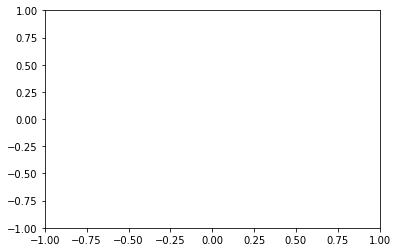

In [30]:
# Create an animation for a random walk
walk = [np.array([0, 0, 0])] # starting point

fig, ax = plt.subplots()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
anim = animation.FuncAnimation(fig, run, frames = 400, interval=20)

Uncomment the next code block to get the animation. Note: takes some time!

In [31]:
# HTML(anim.to_jshtml()) # uncomment this to generate the animation Warning: takes a bit of time - play around with 'frames' to change this